In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Cargar el dataset de speeches
df_speeches = pd.read_csv('datasets/speeches.csv')
df_speeches

,Unnamed: 0,Name,Inaugural Address,Date,text
0,4,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and of the House...
1,5,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again called upon by t...
2,6,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in early times, ..."
3,7,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CALLED upon to ...
4,8,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to that qualific..."
5,9,James Madison,First Inaugural Address,"Saturday, March 4, 1809",UNWILLING to depart from examples of the most...
6,10,James Madison,Second Inaugural Address,"Thursday, March 4, 1813",ABOUT to add the solemnity of an oath to the ...
7,11,James Monroe,First Inaugural Address,"Tuesday, March 4, 1817",I SHOULD be destitute of feeling if I was not...
8,12,James Monroe,Second Inaugural Address,"Monday, March 5, 1821",Fellow-Citizens: I SHALL not attempt to desc...
9,13,John Quincy Adams,Inaugural Address,"Friday, March 4, 1825",IN compliance with an usage coeval with the e...


Hola...

In [2]:
#selección de los mensajes
docs = df_speeches["text"].as_matrix()
len(docs)

58

In [3]:
import nltk # natural language tool kit
nltk.download('stopwords') # descarga diccionario de stopwords
nltk.download('punkt') # descarga ...
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import adjusted_rand_score

stemmer = SnowballStemmer("english")

# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('government')
stopwords.append('american')
stopwords.append('united')
stopwords.append('states')

# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens


[nltk_data] Downloading package stopwords to /home/alan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/alan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


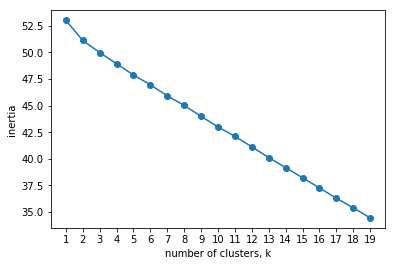

In [4]:
# K-means

import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

#vectorizer = TfidfVectorizer(stop_words='english',tokenizer=tokenize_and_stem, ngram_range=(1,2))
vectorizer = TfidfVectorizer(stop_words='english',tokenizer=tokenize_only, ngram_range=(1,2))
X = vectorizer.fit_transform(docs) # aplicar sobre nuestro documento
num_k = range(1, 20)
inertias = []

for k in num_k: # tomamos 20 valores de k para ver cuál sería el k óptimo
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, n_init=10)

    # Fit model to samples
    model.fit(X)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)



# Plot ks vs inertias
plt.plot(num_k, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(num_k)
plt.show()

In [5]:
true_k = 7 # El valor justo antes de que haya una disminución en la pendiente (entre los valores del gráfico anterior)

In [7]:
#Aplicando Modelos Probabilistas de Tópicos y LDA
from sklearn.decomposition import LatentDirichletAllocation

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

tf_vectorizer = CountVectorizer(max_df=0.15, min_df=5,
                                stop_words=stopwords,tokenizer=tokenize_only, ngram_range=(2,2))
# max_df=0.90 si aparecen en el 90% de los documentos las saca
# min_df= si la frecuencia de aparición es 2 (muy baja) las saca
tf = tf_vectorizer.fit_transform(docs)
diccionario= tf_vectorizer.get_feature_names()


#Estimación de LDA con Bayes Variacional
#for i in range(10):
lda = LatentDirichletAllocation(n_components=7, max_iter=10,
                                learning_method='online',
                                learning_offset=50., # Revisar qué es cada uno de estos parámetros...
                                random_state=0)

lda.fit(tf)
#Cálculo de índice de ajuste de los datos
print(lda.perplexity(tf))
print("\nTopics in LDA model:")
print_top_words(lda, diccionario, 10)


439.34315696089067

Topics in LDA model:
Topic #0: political parties time history america must old world within limits must act state governments human dignity among us best ability
Topic #1: go forward thank god great small know america america america old world many years imposed upon justice mr. president bush
Topic #2: social order public officers constitution laws body people shall continue civil service upon people love liberty rest upon made us
Topic #3: every man men 's service country among us new world civil rights common good perfect union public private common country
Topic #4: america 's people 's father country public money public service free institutions north south regard rights us remember defend constitution
Topic #5: peace shall america must america 's constitution laws new world generation americans citizens world domestic institutions know america north south
Topic #6: within limits chief magistrate public money best interests shall endeavor time peace indian trib

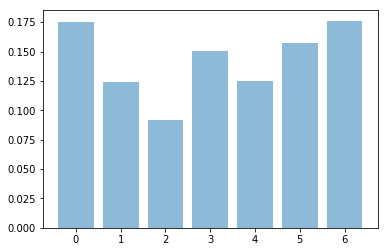

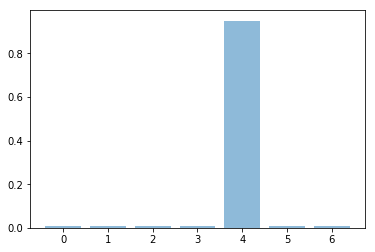

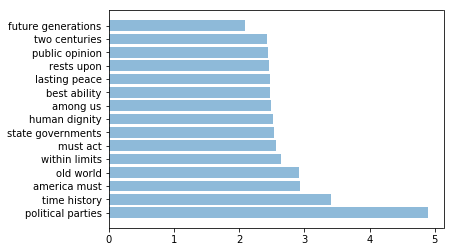

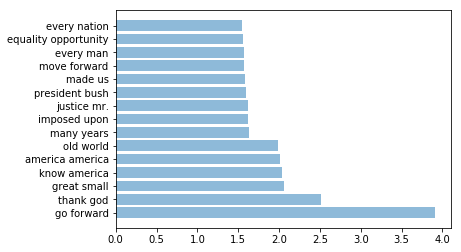

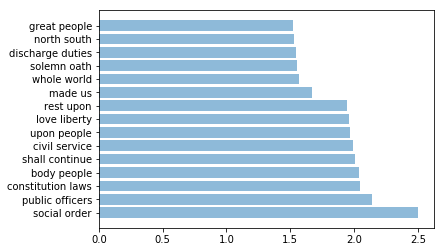

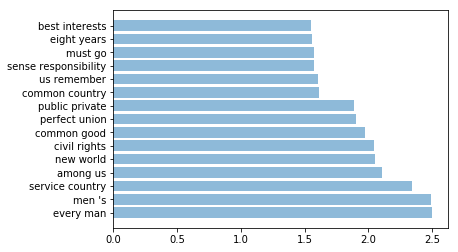

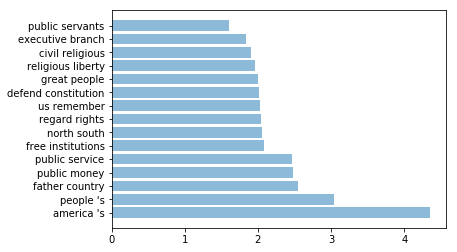

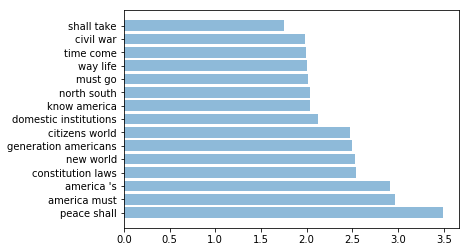

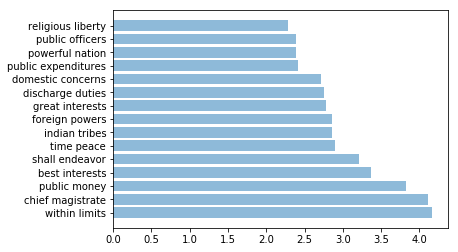

In [10]:
#Generando algunos gráficos de los resultados
from matplotlib.pylab import hist, show
import seaborn as sns

y=lda.fit_transform(tf)

#distribución de tópicos en todos los documentos
dist = sum(y)/len(docs)
w=np.arange(0,true_k)
plt.bar(w,height=dist,alpha=0.5,tick_label=w)
show()
#distribución de tópicos en el documento 100
plt.bar(w,height=y[50],alpha=0.5,tick_label=w)
show()


#frecuencia de palabras por tópico
n_top_words=15
numo =np.arange(0,n_top_words)
for idx,topic in enumerate(lda.components_):
    d =[]
    s = []
    for i in topic.argsort()[:-n_top_words - 1:-1]:
          s.append(diccionario[i])
          d.append(topic[i])
    
    plt.barh(numo,width=d,alpha=0.5,tick_label=s)
    show()


<h3>Se pueden distinguir claramente los distintos tópicos y como agrupan los discursos, incluso mirando sólo las palabras más frecuentes es posible inferir las categorías que se han identificado como representativas del tema de los discursos.</h3>